# **Diamonds Exploratory Data Analysis**
**4C's - Carat, Clarity, Colour and Cut**

![imgs](https://i.pinimg.com/736x/ee/20/82/ee208232377a87b77968813534eb707a.jpg)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
import matplotlib.ticker as ticker

## Loading and Preprocessing

In [7]:
nb_dir = Path().resolve()
data_dir = nb_dir.parent / 'Data' / 'diamonds.csv'
df = pd.read_csv(data_dir).drop(columns='Unnamed: 0')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
def preprocess_data(df, exchange_rate=13.5):
    """
    Preprocess the diamond DataFrame with the following steps:
    - Convert:  price, USD to BWP (Botswana Pula)
                float32 for memory efficiency
                categorical columns to category dtype
    - add 'volume' feature from the dimensions x, y, z
    
    - display summary info and memory usage
    
    Args:
        df 
    """
    
    # Convertion price and dtypes to Botswana Pula (BWP)
    df['price_bwp'] = (df['price'] * exchange_rate).round(2)
    
    numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
    df[numeric_cols] = df[numeric_cols].astype('float32')
    
    categorical_cols = ['cut', 'color', 'clarity']
    df[categorical_cols] = df[categorical_cols].apply(lambda col: col.astype('category'))
    
    # Create volume feature
    df['volume'] = (df['x'] * df['y'] * df['z']).astype('float32')
    
    # drop other
    df = df.drop(columns=['x', 'y', 'z', 'price'])
    
    # summary info
    print("\nOptimized df:")
    print(df.info())
    print("\nSample Data:")
    print(df.head())

    
    return df
df = preprocess_data(df)


Optimized df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float32 
 1   cut        53940 non-null  category
 2   color      53940 non-null  category
 3   clarity    53940 non-null  category
 4   depth      53940 non-null  float32 
 5   table      53940 non-null  float32 
 6   price_bwp  53940 non-null  float64 
 7   volume     53940 non-null  float32 
dtypes: category(3), float32(4), float64(1)
memory usage: 1.4 MB
None

Sample Data:
   carat      cut color clarity      depth  table  price_bwp     volume
0   0.23    Ideal     E     SI2  61.500000   55.0     4401.0  38.202034
1   0.21  Premium     E     SI1  59.799999   61.0     4401.0  34.505856
2   0.23     Good     E     VS1  56.900002   65.0     4414.5  38.076889
3   0.29  Premium     I     VS2  62.400002   58.0     4509.0  46.724579
4   0.31     Good     J

## Basic Statistics & Distributions


Numerical Feature Summary:
             count          mean           std     min           25%  \
carat      53940.0      0.797940      0.474011     0.2      0.400000   
depth      53940.0     61.749405      1.432621    43.0     61.000000   
table      53940.0     57.457184      2.234491    43.0     56.000000   
price_bwp  53940.0  53092.796246  53857.436465  4401.0  12825.000000   
volume     53940.0    129.849411     78.245262     0.0     65.136826   

                    50%           75%            max  
carat          0.700000      1.040000       5.010000  
depth         61.799999     62.500000      79.000000  
table         57.000000     59.000000      95.000000  
price_bwp  32413.500000  71877.375000  254110.500000  
volume       114.808571    170.842445    3840.598389  


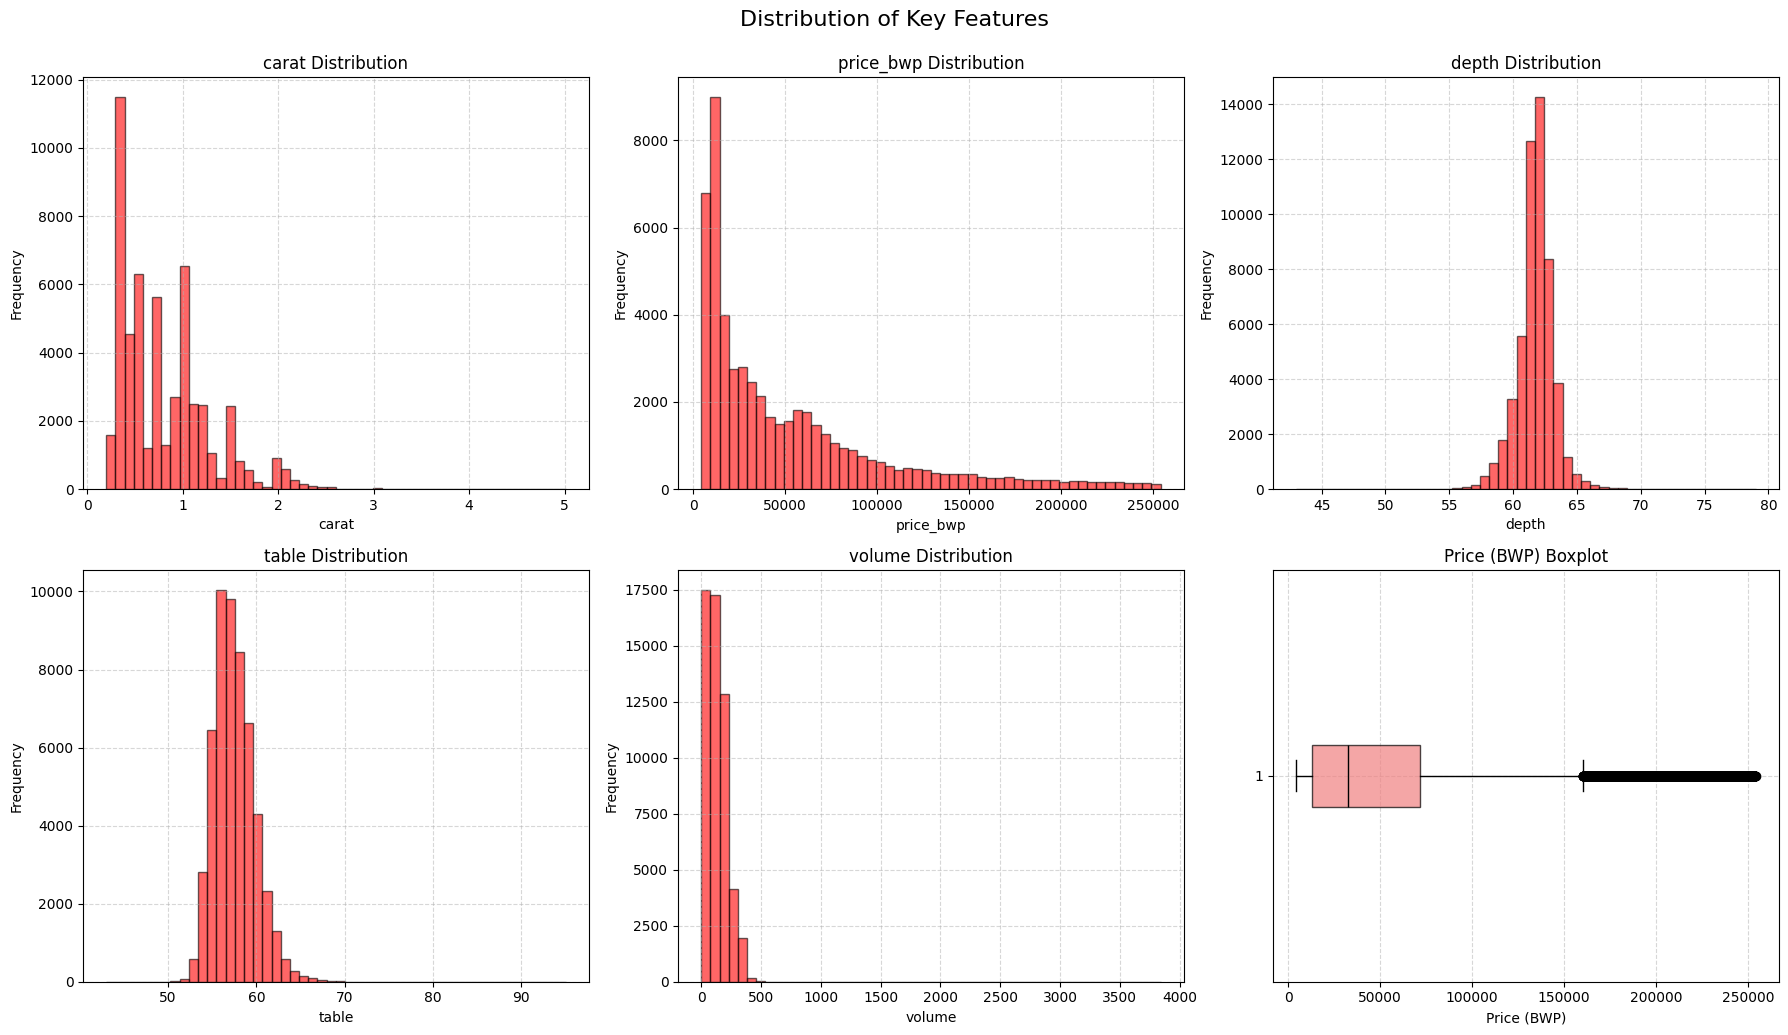

In [25]:
# Summary statistics
print("\nNumerical Feature Summary:")
print(df.describe().transpose())


def histograms(df):
    """
    Plots histograms and a boxplot for key numerical features using matplotlib only.
    """
    features = ['carat', 'price_bwp', 'depth', 'table', 'volume']
    # titles = ['Carat Weight', 'Price (BWP)', 'Depth %', 'Table %', 'Volume']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    # view histograms
    for i, col in enumerate(features):
        data = df[col].dropna()
        axes[i].hist(data, bins=50, color='r', edgecolor='black', alpha=0.6)
        axes[i].set_title(f"{col} Distribution")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].grid(True, linestyle='--', alpha=0.5)

    #  boxplot for price_bwp
    price_data = df['price_bwp'].dropna()
    axes[5].boxplot(price_data, vert=False, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='black'))
    axes[5].set_title('Price (BWP) Boxplot')
    axes[5].set_xlabel('Price (BWP)')
    axes[5].grid(True, linestyle='--', alpha=0.5)


    plt.tight_layout()
    plt.suptitle("Distribution of Key Features", fontsize=16, y=1.03)
    plt.show()
histograms(df)

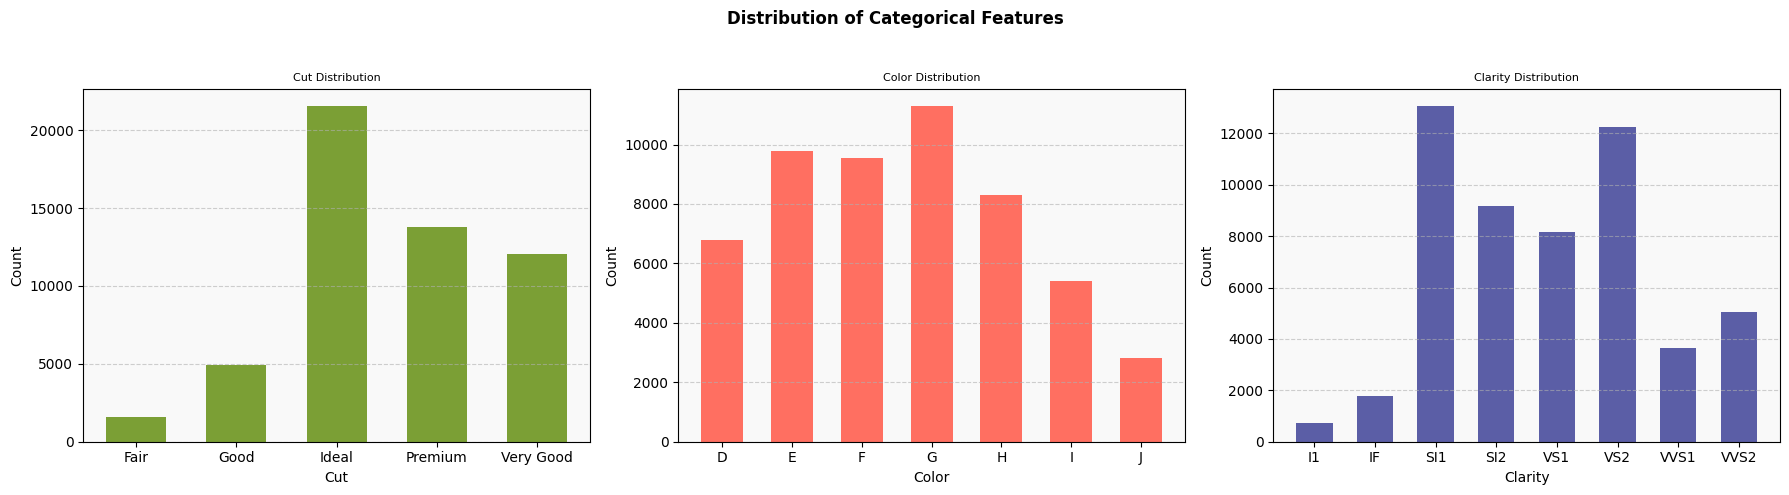

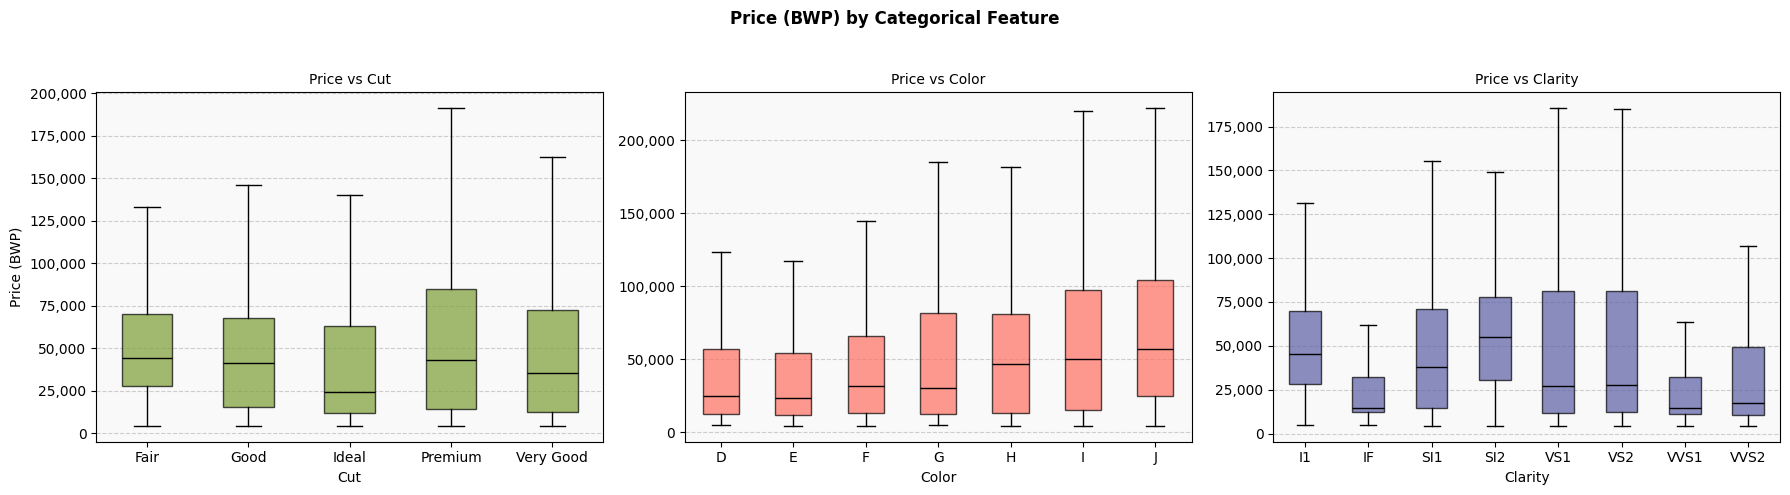

In [26]:


def categorical_dist(df):
    """
    Plots bar charts and box plots for categorical features
    """
    # Define some colours
    colours = {
        'cut': '#7B9F35',
        'color': '#FF6F61',
        'clarity': '#5B5EA6'
    }

    # --- Bar Plots for Category Counts ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Distribution of Categorical Features', fontsize=12, fontweight='bold')

    for ax, col in zip(axes, ['cut', 'color', 'clarity']):
        counts = df[col].value_counts().sort_index()
        ax.bar(counts.index.astype(str), counts.values, color=colours[col], width=0.6)
        ax.set_title(f"{col.capitalize()} Distribution", fontsize=8)
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel('Count')
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.set_facecolor('#f9f9f9')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # --- Box Plots for Price by Category ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Price (BWP) by Categorical Feature', fontsize=12, fontweight='bold')

    for ax, col in zip(axes, ['cut', 'color', 'clarity']):
        categories = df[col].cat.categories if df[col].dtype.name == 'category' else sorted(df[col].unique())
        positions = range(len(categories))
        data = [df[df[col] == cat]['price_bwp'] for cat in categories]

        ax.boxplot(data, positions=positions, patch_artist=True,
                   boxprops=dict(facecolor=colours[col], alpha=0.7),
                   medianprops=dict(color='black'),
                   showfliers=False)
        ax.set_xticks(positions)
        ax.set_xticklabels(categories)
        ax.set_title(f"Price vs {col.capitalize()}", fontsize=10)
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel('Price (BWP)' if col == 'cut' else '')
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.set_facecolor('#f9f9f9')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
categorical_dist(df)

# Multivariate Analysis

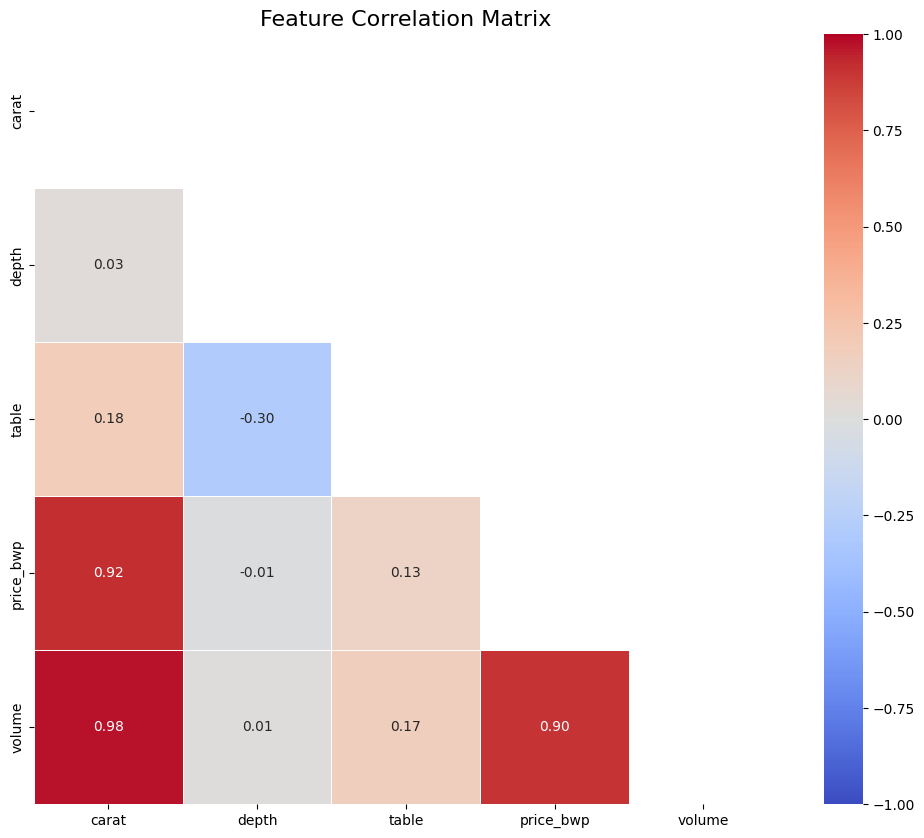

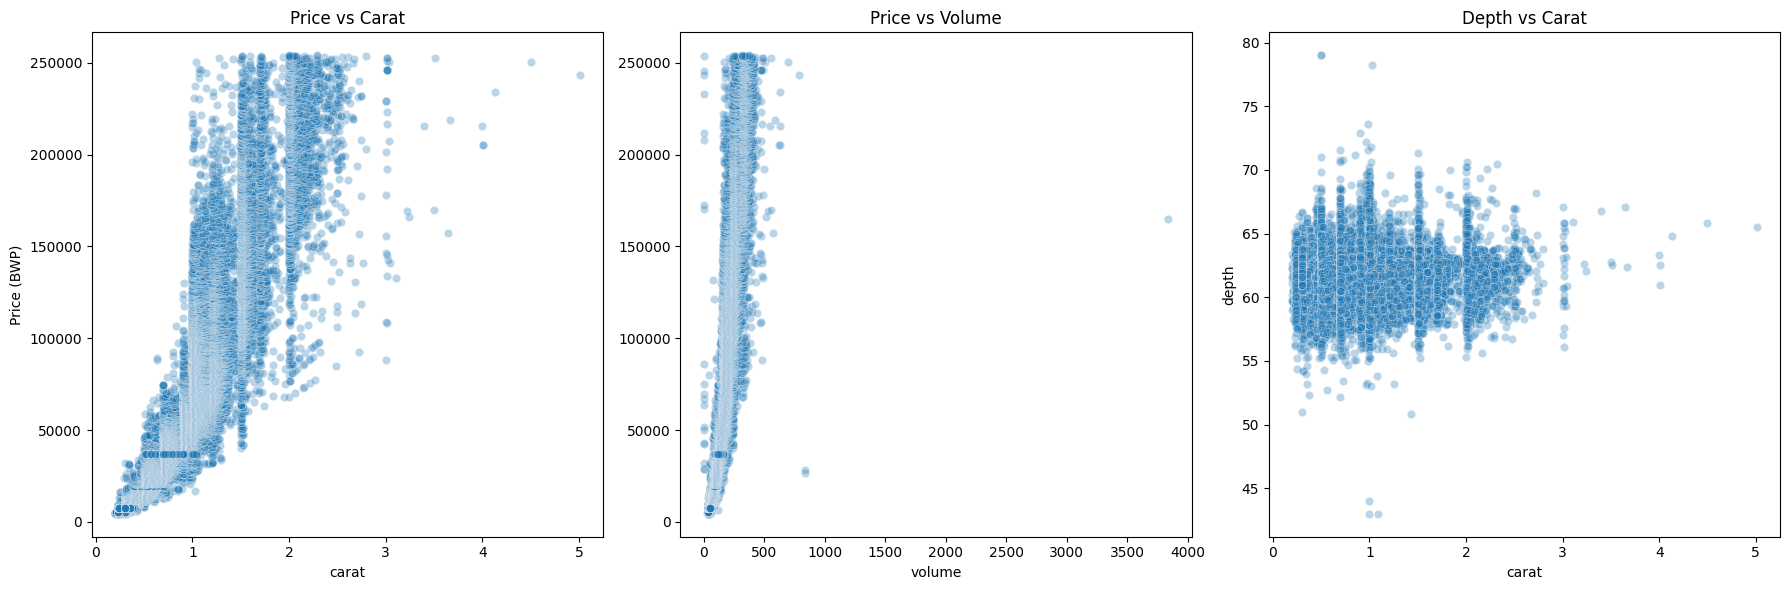

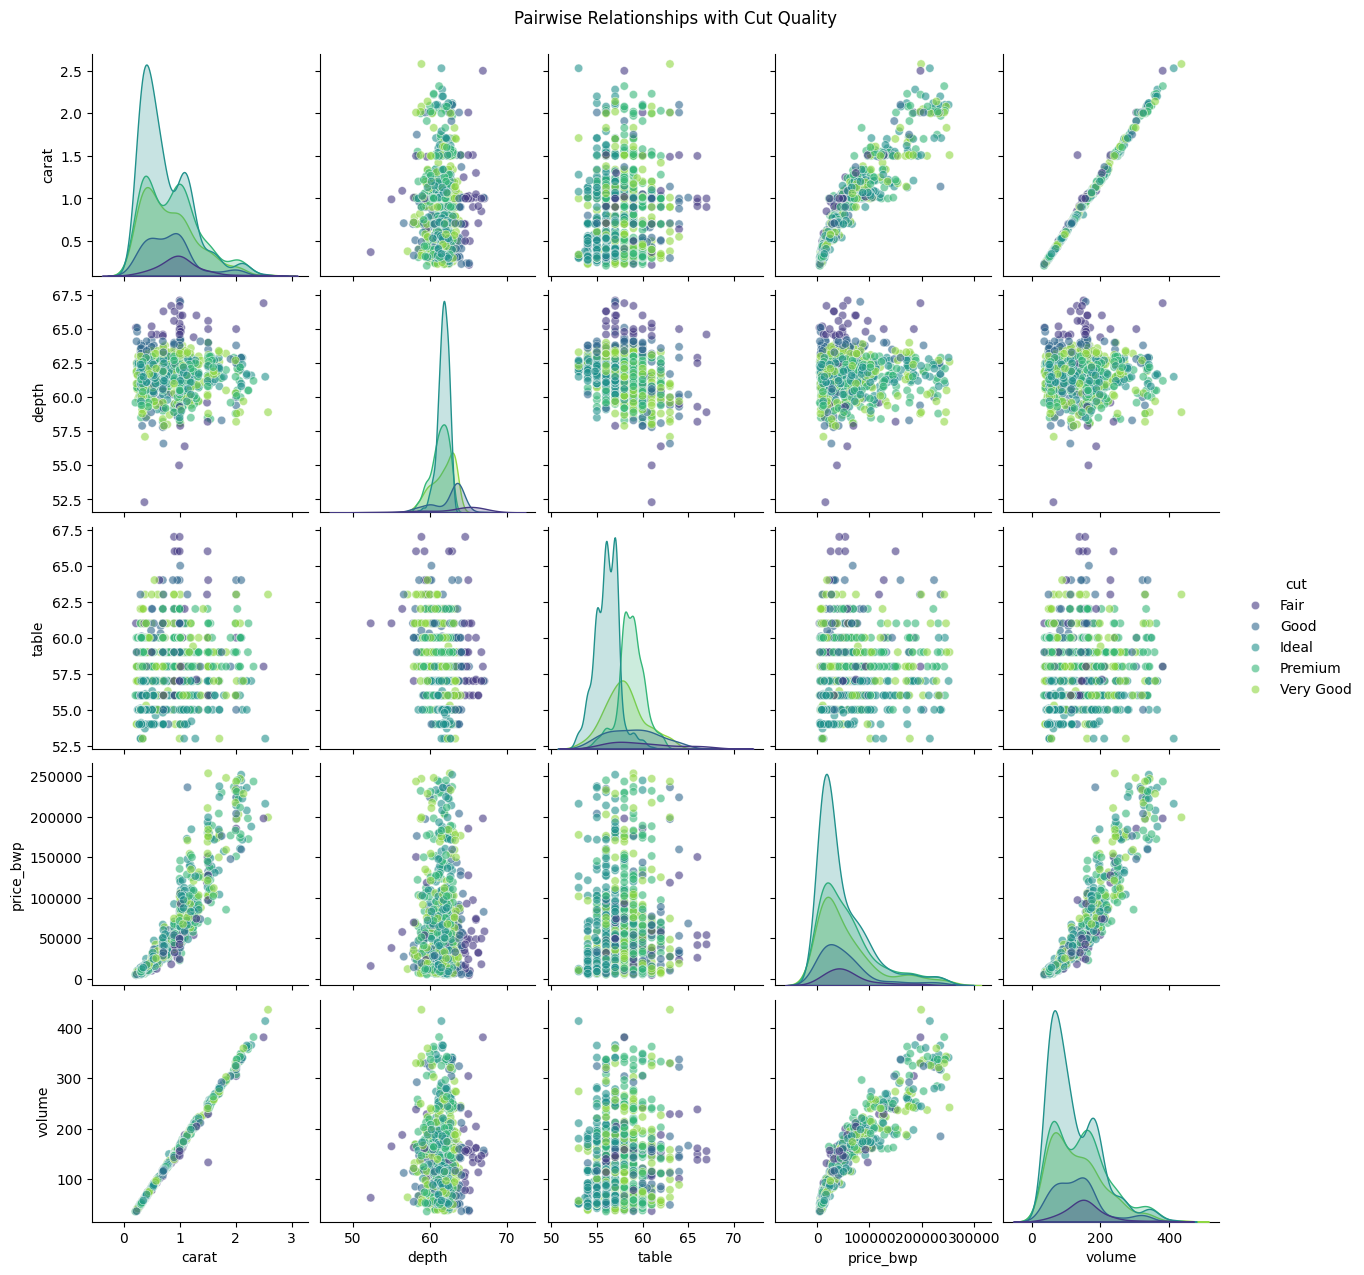

In [11]:
# Correlation matrix
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Scatter plots of key relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x='carat', y='price_bwp', data=df, alpha=0.3, ax=axes[0])
axes[0].set_title('Price vs Carat')
axes[0].set_ylabel('Price (BWP)')

sns.scatterplot(x='volume', y='price_bwp', data=df, alpha=0.3, ax=axes[1])
axes[1].set_title('Price vs Volume')
axes[1].set_ylabel('')

sns.scatterplot(x='carat', y='depth', data=df, alpha=0.3, ax=axes[2])
axes[2].set_title('Depth vs Carat')

plt.tight_layout()
plt.show()


# Interactive pairplot of key features (sample for performance)
sample_df = df.sample(1000)
sns.pairplot(sample_df, vars=['carat', 'depth', 'table', 'price_bwp', 'volume'], 
             hue='cut', palette='viridis', plot_kws={'alpha':0.6})
plt.suptitle('Pairwise Relationships with Cut Quality', y=1.02)
plt.show()





## Key Insights from EDA:

1. **Correlations**:
   - strong corelation between price , carat and volume, not suprising.
   - medium corelation between depth and table , others not so significant

2. **Quality Characteristics**:
   - Cut: Most diamonds are "Ideal" or "Premium" cut
   - Color: G and H colors are most common
   - Clarity: SI1 and VS2 clarity grades dominate the dataset

3. **Important Relationships**:
   - Carat has the strongest correlation with price (r=0.92)
   - Higher quality grades (better cut, better color, better clarity) command higher prices per carat
   - Volume shows a slightly stronger correlation with price than individual dimensions

4. **Unexpected Findings**:
   - Premium cut diamonds have higher median prices than Ideal cuts
   - J color diamonds have higher prices than I color due to larger average size
   - Depth between 58-64% and table between 53-59% are most common

5. **Data Quality Issues**:
   - Some diamonds have zero dimensions (need removal)
   - Outliers in dimensions (x, y, z) suggest measurement errors
   - Depth and table percentages outside typical diamond ranges
